In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option("display.max_columns", None)

### LOADING THE DATASET

In [8]:
movies = pd.read_csv("tmdb-movies.csv")

In [9]:
movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [10]:
import pandas_profiling
movies.profile_report(title='Movies Data - Report', progress_bar=False)

### DROPPING THE DUPLICATED ROWS

In [11]:
movies.duplicated().sum()

1

In [12]:
# MISSING IMDB ID
movies.duplicated(subset = "imdb_id").sum()+1 == movies.imdb_id.isna().sum()

False

In [13]:
# Movies that probably a remake
movies.duplicated(subset = "original_title").sum()

295

In [14]:
movies.drop_duplicates(subset = ["original_title", "cast"], inplace = True)

In [15]:
movies.drop_duplicates(subset = ["imdb_id", "cast"], inplace = True)

In [16]:
movies.drop_duplicates(subset = ["original_title", "production_companies"], inplace = True)

In [17]:
movies.drop_duplicates(subset = ["original_title", "director"], inplace = True)

In [18]:
movies.drop_duplicates(subset = ["original_title", "homepage"], inplace = True)

In [19]:
movies.drop_duplicates(subset = ["original_title", "tagline"], inplace = True)

In [20]:
movies.drop_duplicates(subset = ["original_title", "genres"], inplace = True)

In [21]:
movies.drop_duplicates(subset = ["original_title", "release_year"], inplace = True)

### CHECKING FOR NULLS

In [22]:
movies.isna().sum()

id                         0
imdb_id                    9
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      74
homepage                7754
director                  43
tagline                 2788
keywords                1472
overview                   4
runtime                    0
genres                    23
production_companies    1022
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10682 non-null  int64  
 1   imdb_id               10673 non-null  object 
 2   popularity            10682 non-null  float64
 3   budget                10682 non-null  int64  
 4   revenue               10682 non-null  int64  
 5   original_title        10682 non-null  object 
 6   cast                  10608 non-null  object 
 7   homepage              2928 non-null   object 
 8   director              10639 non-null  object 
 9   tagline               7894 non-null   object 
 10  keywords              9210 non-null   object 
 11  overview              10678 non-null  object 
 12  runtime               10682 non-null  int64  
 13  genres                10659 non-null  object 
 14  production_companies  9660 non-null   object 
 15  release_date       

### MANIPULATING THE GENRES, CAST, KEYWORDS, AND PRODUCTION COMPANIES COLUMNS

In [24]:
movies.genres = movies.genres.str.split("|")

In [25]:
movies.cast = movies.cast.str.split("|")

In [26]:
movies.keywords = movies.keywords.str.split("|")

In [27]:
movies.production_companies = movies.production_companies.str.split("|")

### GET A SUMMARY STATISTIC OF THE DATA

In [28]:
movies.describe().T

count          mean           std          min           25%  \
id            10682.0  6.673593e+04  9.262666e+04     5.000000  10611.250000   
popularity    10682.0  6.484033e-01  1.005598e+00     0.000065      0.207368   
budget        10682.0  1.472920e+07  3.108094e+07     0.000000      0.000000   
revenue       10682.0  4.010369e+07  1.177091e+08     0.000000      0.000000   
runtime       10682.0  1.018822e+02  3.051467e+01     0.000000     90.000000   
vote_count    10682.0  2.186974e+02  5.785497e+02    10.000000     17.000000   
vote_average  10682.0  5.972075e+00  9.370726e-01     1.500000      5.400000   
release_year  10682.0  2.001555e+03  1.264458e+01  1960.000000   1995.000000   
budget_adj    10682.0  1.760140e+07  3.441552e+07     0.000000      0.000000   
revenue_adj   10682.0  5.132675e+07  1.446260e+08     0.000000      0.000000   

                       50%           75%           max  
id            20856.500000  7.647025e+04  4.178590e+05  
popularity        0.384532  7.162780e-01  3.298576e+01  
budget            0.000000  1.530000e+07  4.250000e+08  
revenue           0.000000  2.411547e+07  2.781506e+09  
runtime          99.000000  1.110000e+02  9.000000e+02  
vote_count       38.000000  1.470000e+02  9.767000e+03  
vote_average      6.000000  6.600000e+00  9.200000e+00  
release_year   2006.000000  2.011000e+03  2.015000e+03  
budget_adj        0.000000  2.085325e+07  4.250000e+08  
revenue_adj       0.000000  3.368194e+07  2.827124e+09

### DROP UNECESSARY COLUMNS, COLUMNS WITH MISSING VALUES FOR GENRE AND IMDB ID

In [29]:
columns_to_drop = ["id", "homepage"]

In [30]:
movies.drop(columns_to_drop, axis = "columns", inplace = True)

In [31]:
movies.dropna(subset=["imdb_id", "genres"], inplace = True)

In [32]:
movies.isna().mean()*100

imdb_id                  0.000000
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.685317
director                 0.356741
tagline                 25.966955
keywords                13.621855
overview                 0.018776
runtime                  0.000000
genres                   0.000000
production_companies     9.434848
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [33]:
Release_Years = sorted(list(movies.release_year.unique()))

In [34]:
def accumulation_by_genre_and_year(j, attribute = "genres", year= None, accum="Total"):
    if year == None:
        movies_year = movies.copy()
        year = "Total"
    else:
        movies_year = movies[movies["release_year"]==year]
    
    Genres = {}
    i = 0
    for genres in movies_year[attribute]:
        if type(genres) is list:
            for genre in genres:
                if genre in Genres:
                    Genres[genre] = Genres[genre] + 1
                else:
                    Genres[genre] = 0
                    
    Genre_average_popularity = {}
    for Genre in list(Genres):
        i = 0
        Genre_average_popularity[Genre] = 0
        for genres in movies_year[attribute]:
            if type(genres) is list:
                if Genre in genres:
                    Genre_average_popularity[Genre] = Genre_average_popularity[Genre] + movies_year.iloc[i,j]
            i +=1
        if accum == "avg":
            if year == None or year == "Total":
                year = "Average"
            Genre_average_popularity[Genre] = Genre_average_popularity[Genre]/ Genres[Genre]
    Genre_average_popularity = pd.DataFrame(Genre_average_popularity, index=[year])
    Genre_average_popularity = Genre_average_popularity.T
    Genre_average_popularity.columns = [year]
    Genre_average_popularity = Genre_average_popularity.sort_values(year, ascending = False)
    return Genre_average_popularity

### WHAT ARE THE MOST POPULAR GENRES

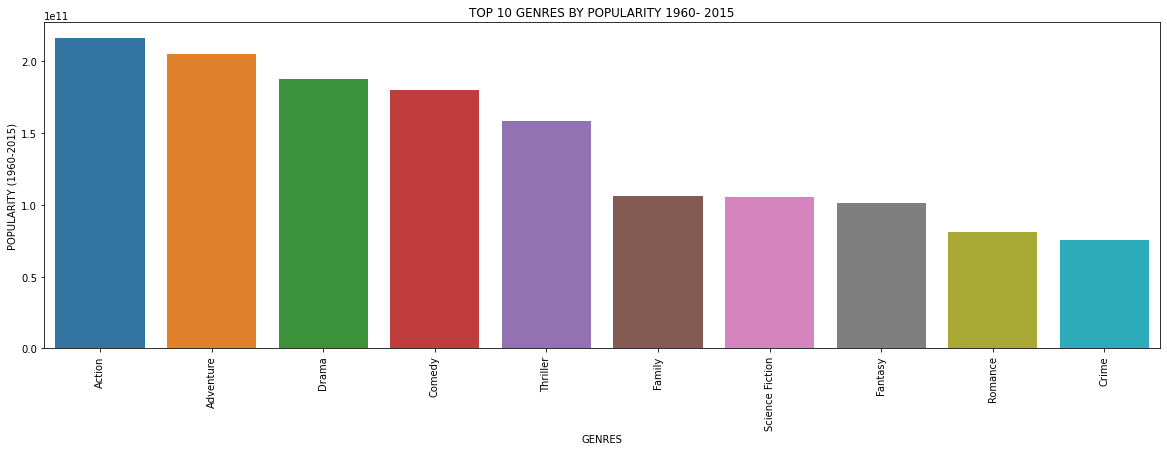

<Figure size 432x288 with 0 Axes>

In [35]:
Top_10_Genres_by_popularity = accumulation_by_genre_and_year(-1).rename(columns={"Total":"Total Popularity (1960-2015)"}).iloc[:10]
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_10_Genres_by_popularity, x=Top_10_Genres_by_popularity.index, y="Total Popularity (1960-2015)", ax= ax)
g.set_xticklabels(labels= list(Top_10_Genres_by_popularity.index),rotation = 90)
ax.set_title("TOP 10 GENRES BY POPULARITY 1960- 2015")
ax.set_xlabel("GENRES")
ax.set_ylabel("POPULARITY (1960-2015)")
plt.show()
plt.clf()

Defining a function that accumulates or aggregates data from 1960-2015

In [36]:
def Genre_1960_2020(parameter, attribute="genres"):    
    Revenue_1960 = accumulation_by_genre_and_year(parameter,attribute= attribute, year=1960)
    for year in Release_Years[1:]:
        _year = accumulation_by_genre_and_year(parameter,attribute = attribute, year= year)
        Revenue_1960 =pd.concat([Revenue_1960,_year], axis=1)

    Revenue_1960.replace([np.inf, -np.inf], np.nan, inplace = True)
    Revenue_1960.fillna(0, inplace = True)
    return Revenue_1960

Defining a function that plots a line plot from 1960-2015 of each genres with respect a value

In [37]:
def genre_plot(_1960):
    fig,ax = plt.subplots(2,2, figsize = (24,12), sharex=True,sharey=True,)
    sns.lineplot(data=_1960.T.iloc[:,:5], ax= ax[0,0])
    sns.lineplot(data=_1960.T.iloc[:,5:10], ax= ax[0,1])
    sns.lineplot(data=_1960.T.iloc[:,10:15], ax= ax[1,0])
    sns.lineplot(data=_1960.T.iloc[:,15:], ax= ax[1,1])
    plt.show()
    plt.clf()

### WHICH GENRES ARE THE MOST POPULAR SHOWS AND WHICH SHOWS HAVE GAINED MORE POPULARITY OVER THE YEARS

While other genres have an increasing poularity, History, war, music and foreign have consistently being the most unpopular genres. From the late 90s the other genres have been gaining more popularity among viewers, Genres like,

     drama
     action
     Comedy
     Thriller
     Adventure
     Science fiction 

have become the most popular genres since the start of the 21st century. Since 2010, Thriller, drama, action, thriller, and science fiction experenced increased in popularit exponentially

In [38]:
Popularity_1960_2015 = Genre_1960_2020(1)

In [39]:
Popularity_1960_2015.shape

(20, 56)

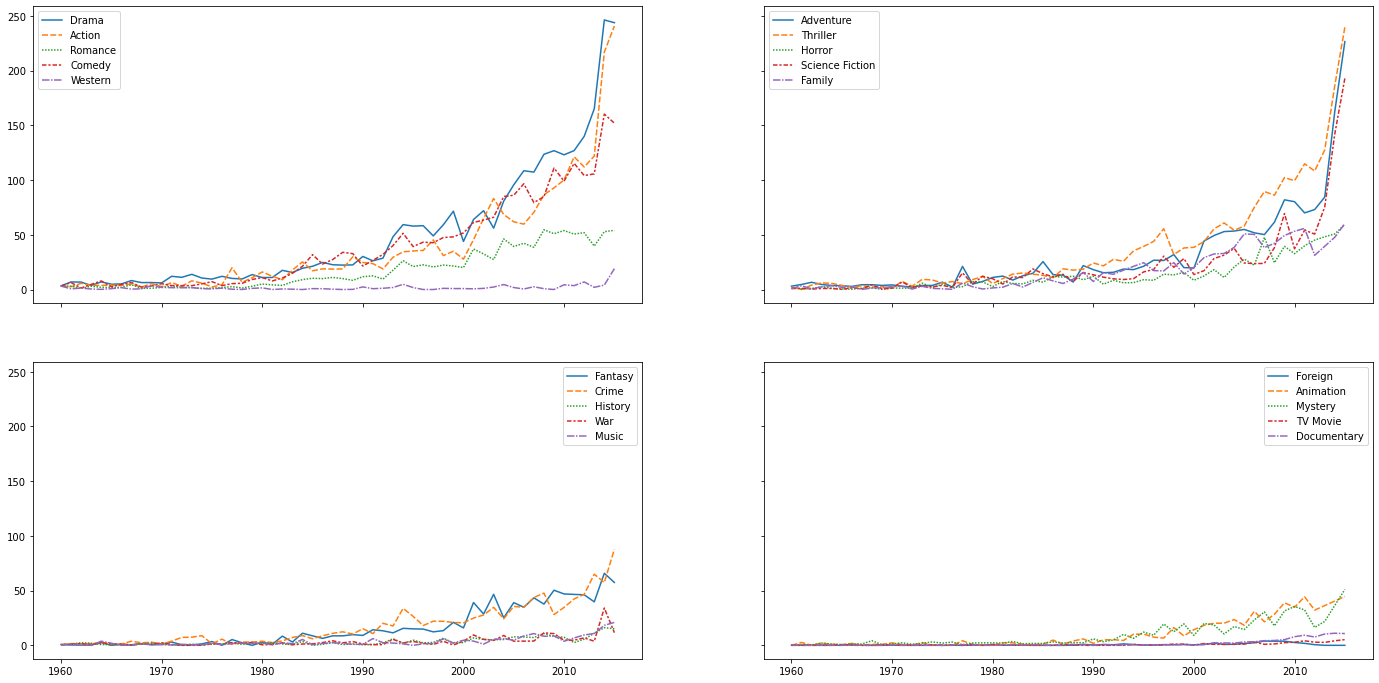

<Figure size 432x288 with 0 Axes>

In [40]:
genre_plot(Popularity_1960_2015)

### WHICH GENRES HAS THE HIGHEST REVENUE
The Genres with the highest cummulative revenue are 
- Action
- Adventure
- Comedy
- Drama
- Thriller

In [41]:
accumulation_by_genre_and_year(-1).rename(columns={"Total":"Total Revenue (1960-2020)"}).head()

Total Revenue (1960-2020)
Action                  2.162094e+11
Adventure               2.048230e+11
Drama                   1.872189e+11
Comedy                  1.801576e+11
Thriller                1.582243e+11

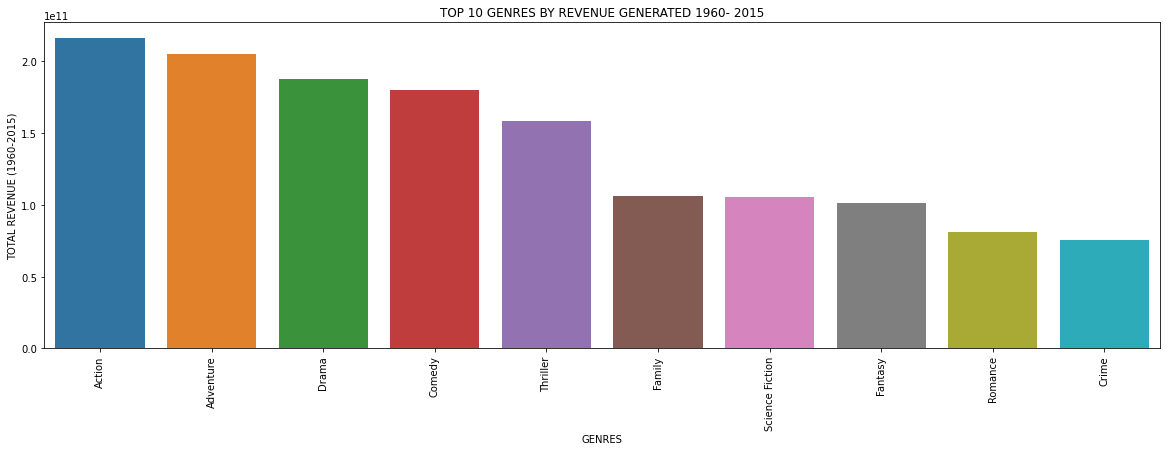

<Figure size 432x288 with 0 Axes>

In [42]:
Top_10_Genres_by_adjusted_revenue = accumulation_by_genre_and_year(-1).rename(columns={"Total":"Total Revenue (1960-2020)"}).iloc[:10]
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_10_Genres_by_adjusted_revenue, x=Top_10_Genres_by_adjusted_revenue.index, y="Total Revenue (1960-2020)", ax= ax)
g.set_xticklabels(labels= list(Top_10_Genres_by_adjusted_revenue.index),rotation = 90)
ax.set_title("TOP 10 GENRES BY REVENUE GENERATED 1960- 2015")
ax.set_xlabel("GENRES")
ax.set_ylabel("TOTAL REVENUE (1960-2015)")
plt.show()
plt.clf()

### WHICH GENRE HAS YIELDED MORE REVENUE OVER THE YEARS AND WHICH GENRES ARE MOST LIKELY TO YEILD MORE REVENUE
Renenue genereated by genres like action, adventure, comedy, drama and family are have had an upward trend, unlike genres like Western, Foreign, history and war that generated rerlatively constant revenue over the years, with no sign of improvemet. fantasy and Science fiction generated less revenues from the 1960s to the early 1990s (though fantasy had a sharp increase in the late 1970s, the declined back), it experienced a surge from the early 1990s and has had their ups and downs since then. why is it to? Since the beginning of the 21st century, action, adventure and thriller have generaed an increasing revenue. Could this be as a result of technological advancement? does it have to do with their sharp increase in popularity? or is it because more budget has been allocated to these genres?

In [43]:
Revenue_1960 = Genre_1960_2020(-1)

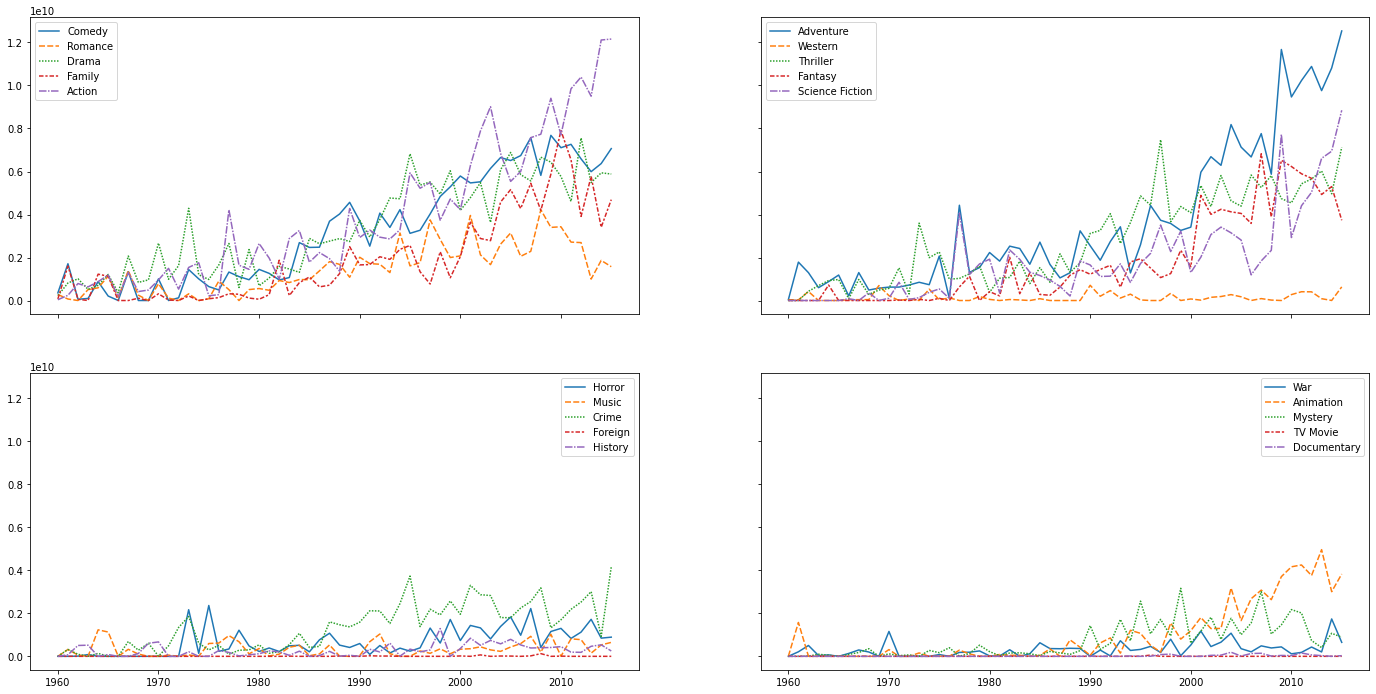

<Figure size 432x288 with 0 Axes>

In [44]:
genre_plot(Revenue_1960)

### WHAT HAS BEEN THE TREND OF BUDGET FOR EACH CATEGORY

In [45]:
Budget_by_Genre_1960_2020 = Genre_1960_2020(-2)

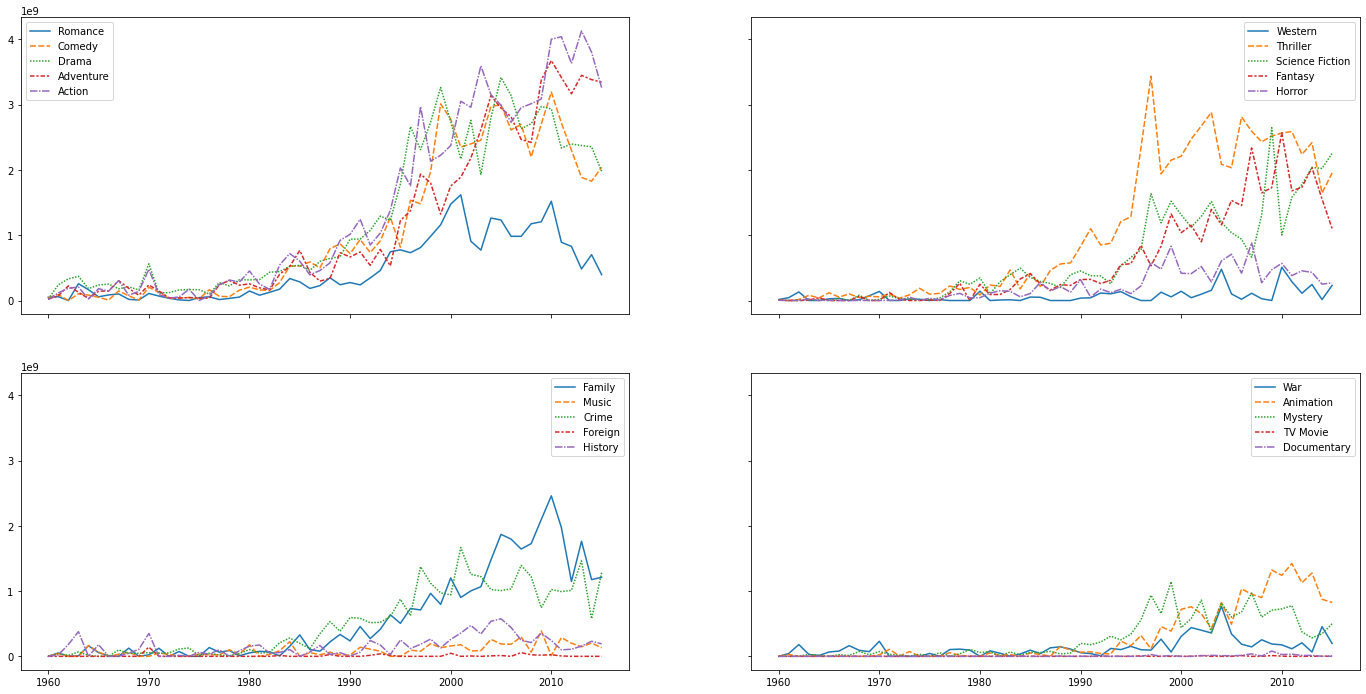

<Figure size 432x288 with 0 Axes>

In [46]:
genre_plot(Budget_by_Genre_1960_2020)

### IS THE A RELATIONSHIP BETWEEN POPULARITY AND REVENUE?
Poularity has a strong relationship as indicated by it correlation of 0.61 with revenue. It indictatef that the more popular a movie is the higher its chances of generating of higher revenue. But NOTE, Correlation is not causation

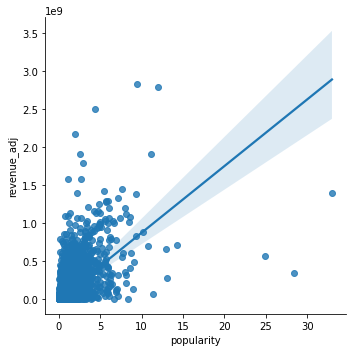

In [47]:
sns.lmplot(
    data=movies,
    x="popularity",
    y="revenue_adj")

In [48]:
movies.revenue_adj.corr(movies.popularity)

0.6100492594032334

### WHAT OTHER FACTORS HAVE A LIKELY EFFECT ON REVENUE GENERATED BY A MOVIE

These factors are more likely to affect the revenue generated by a movies (in descending order)
- Vote Count
- Budget
- Popularity
- The average vote (it has a weak correlation with revenue)
- Runtime (It has a weak correlation with revenue)

In [49]:
movies.corr().iloc[-1].sort_values(ascending = False)

revenue_adj     1.000000
revenue         0.922676
vote_count      0.710893
budget_adj      0.648455
budget          0.625961
popularity      0.610049
vote_average    0.193729
runtime         0.181432
release_year   -0.064665
Name: revenue_adj, dtype: float64

### OVER THE DECADES, HOW MUCH REVENUE WAS GENERATED BY THE DIFFERENT PRODUCTION COMPANIES (ADJUSTED REVENUE)

In [50]:
Revenue_production_company_1960_2015 = accumulation_by_genre_and_year(-1, "production_companies")

In [51]:
Revenue_production_company_1960_2015.head()

Total
Warner Bros.                            7.093094e+10
Universal Pictures                      6.343128e+10
Paramount Pictures                      5.597119e+10
Twentieth Century Fox Film Corporation  5.180688e+10
Walt Disney Pictures                    3.569754e+10

### OVER THE DECADES, HOW MUCH BUDGET WAS ALLOCATED BY THE DIFFERENT PRODUCTION COMPANIES (ADJUSTED REVENUE)

In [52]:
Budget_production_company_1960_2015 = accumulation_by_genre_and_year(-2, "production_companies")

In [53]:
Budget_production_company_1960_2015.head()

Total
Warner Bros.                            2.410293e+10
Universal Pictures                      1.871253e+10
Paramount Pictures                      1.685610e+10
Twentieth Century Fox Film Corporation  1.280128e+10
Columbia Pictures                       1.254735e+10

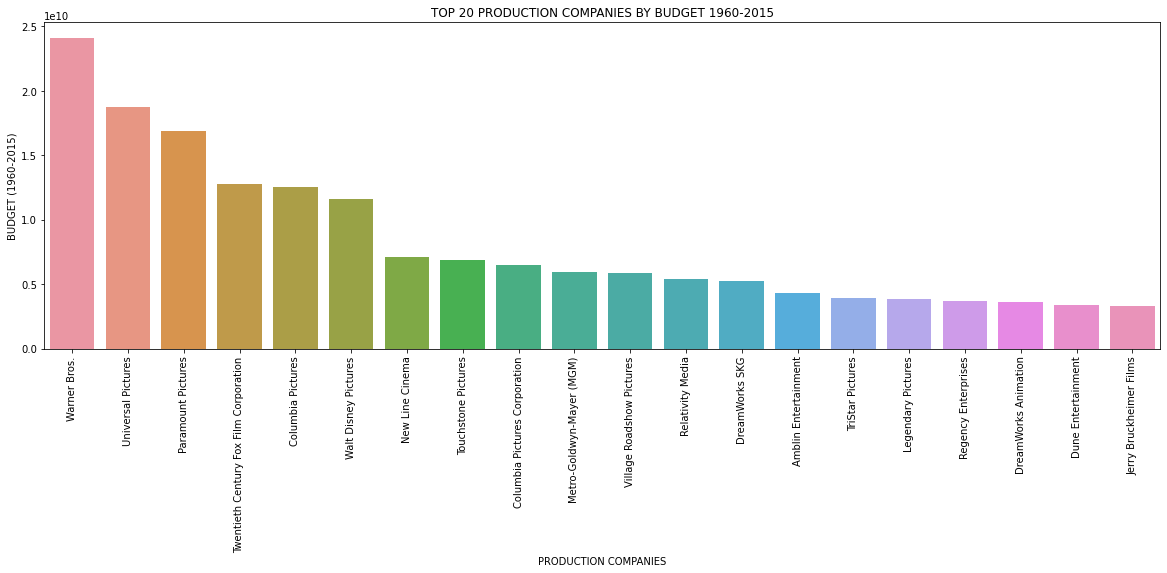

<Figure size 432x288 with 0 Axes>

In [54]:
Top_20_Companies_by_budget = Budget_production_company_1960_2015.iloc[:20] #.rename(columns={"Total":"Total Budget (1960-2015)"}).iloc[:20]
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_10_Genres_by_popularity, x=Top_20_Companies_by_budget.index,y=Top_20_Companies_by_budget.Total,  ax= ax)
g.set_xticklabels(labels= list(Top_20_Companies_by_budget.index),rotation = 90)
ax.set_title("TOP 20 PRODUCTION COMPANIES BY BUDGET 1960-2015")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("BUDGET (1960-2015)")
plt.show()
plt.clf()

### OVER THE DECADES, HOW POPULAR WERE  THE DIFFERENT PRODUCTION COMPANIES AND WHICH IS THE MOST POPULAR

In [55]:
Popularity_production_company_1960_2015 = accumulation_by_genre_and_year(1, "production_companies")

In [56]:
Popularity_production_company_1960_2015.head()

Total
Warner Bros.                            585.872910
Universal Pictures                      490.034358
Paramount Pictures                      411.130944
Twentieth Century Fox Film Corporation  341.953313
Walt Disney Pictures                    288.538870

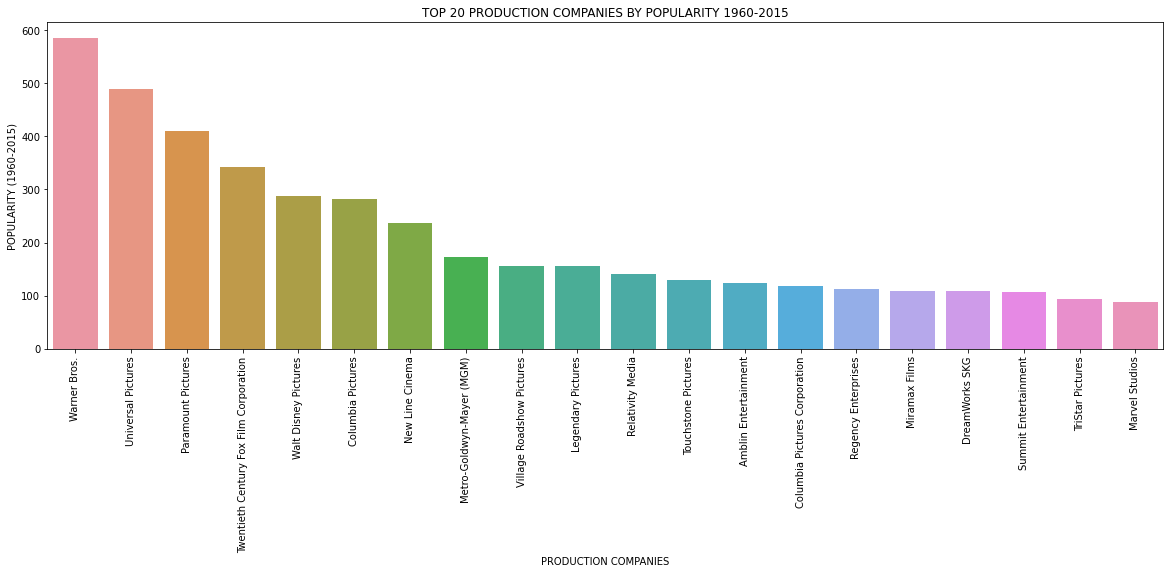

<Figure size 432x288 with 0 Axes>

In [57]:
Top_20_Companies_by_populariy = Popularity_production_company_1960_2015.iloc[:20] #.rename(columns={"Total":"Total Budget (1960-2015)"}).iloc[:20]
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_20_Companies_by_populariy, x=Top_20_Companies_by_populariy.index,y=Top_20_Companies_by_populariy.Total,  ax= ax)
g.set_xticklabels(labels= list(Top_20_Companies_by_populariy.index),rotation = 90)
ax.set_title("TOP 20 PRODUCTION COMPANIES BY POPULARITY 1960-2015")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("POPULARITY (1960-2015)")
plt.show()
plt.clf()

### OVER THE DECADES, HOW MUCH VOTES WERE GARNERED BY DIFFERENT PRODUCTION COMPANIES AND WHICH IS THE MOST VOTED

In [58]:
Vote_count_production_company_1960_2015 = accumulation_by_genre_and_year(-5, "production_companies")

In [59]:
Vote_count_production_company_1960_2015.head(20)

Total
Warner Bros.                            275387
Universal Pictures                      207348
Paramount Pictures                      178735
Twentieth Century Fox Film Corporation  170892
Columbia Pictures                       138322
Walt Disney Pictures                    132404
New Line Cinema                          98188
Legendary Pictures                       85947
Village Roadshow Pictures                73992
Relativity Media                         69569
Amblin Entertainment                     65280
Marvel Studios                           59535
Dune Entertainment                       58247
DreamWorks SKG                           57475
Metro-Goldwyn-Mayer (MGM)                54736
Pixar Animation Studios                  48821
Summit Entertainment                     48109
Touchstone Pictures                      45876
Syncopy                                  45288
Regency Enterprises                      44945

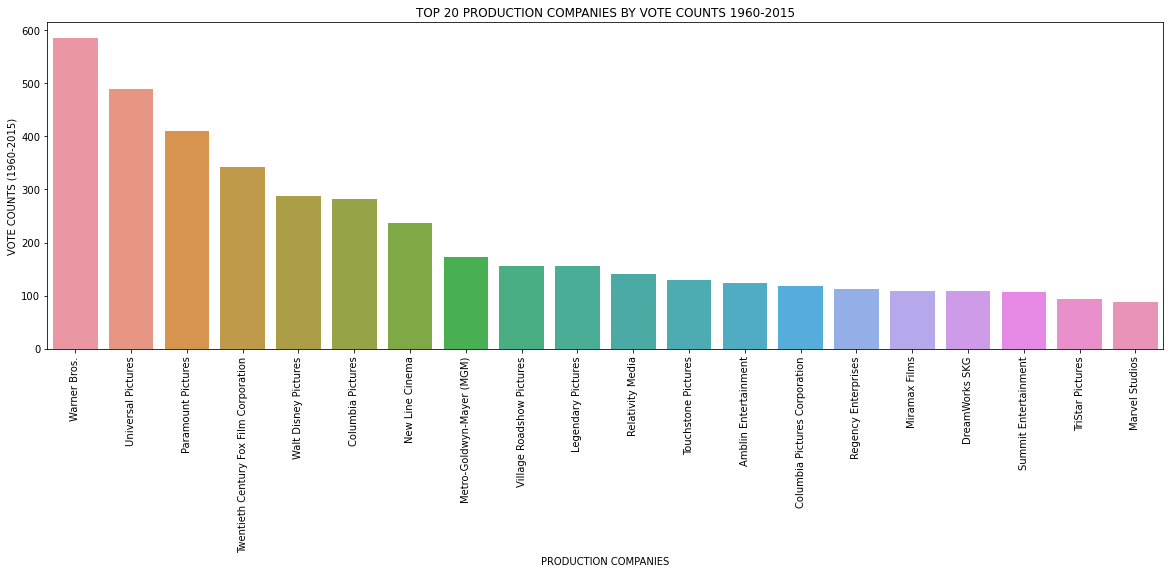

<Figure size 432x288 with 0 Axes>

In [60]:
Top_20_Companies_by_vote_count = Popularity_production_company_1960_2015.iloc[:20] #.rename(columns={"Total":"Total Budget (1960-2015)"}).iloc[:20]
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_20_Companies_by_vote_count, x=Top_20_Companies_by_vote_count.index,y=Top_20_Companies_by_vote_count.Total,  ax= ax)
g.set_xticklabels(labels= list(Top_20_Companies_by_vote_count.index),rotation = 90)
ax.set_title("TOP 20 PRODUCTION COMPANIES BY VOTE COUNTS 1960-2015")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("VOTE COUNTS (1960-2015)")
plt.show()
plt.clf()

Production companies that had high budget for movies, were most popular and most voted genereated the most revenues

In [61]:
Revenue_production_company = Genre_1960_2020(-1, "production_companies" )

In [62]:
Revenue_production_company["Total 1960-2015"] = Revenue_production_company.sum(axis=1)


In [63]:
Revenue_production_company.head()

1960          1961          1962  1963  \
United Artists           1.843242e+08  3.914191e+08  0.000000e+00   0.0   
The Mirisch Company      1.843242e+08  0.000000e+00  0.000000e+00   0.0   
Jerry Lewis Productions  1.260777e+08  0.000000e+00  0.000000e+00   0.0   
Paramount Pictures       1.260777e+08  0.000000e+00  5.766759e+07   0.0   
Grandon Productions      4.423780e+07  0.000000e+00  0.000000e+00   0.0   

                                 1964  1965          1966          1967  \
United Artists           8.695199e+07   0.0  0.000000e+00  1.789764e+08   
The Mirisch Company      0.000000e+00   0.0  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00   0.0  0.000000e+00  0.000000e+00   
Paramount Pictures       0.000000e+00   0.0  4.030809e+07  0.000000e+00   
Grandon Productions      0.000000e+00   0.0  0.000000e+00  0.000000e+00   

                                 1968          1969          1970  1971  \
United Artists           0.000000e+00  2.662142e+08  0.000000e+00   0.0   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   0.0   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   0.0   
Paramount Pictures       2.438703e+08  8.470576e+07  7.660726e+08   0.0   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   0.0   

                                 1972          1973          1974  \
United Artists           9.394704e+07  0.000000e+00  0.000000e+00   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.277914e+09  1.463526e+08  5.819618e+08   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 1975          1976          1977  \
United Artists           1.695012e+08  6.696207e+08  1.376203e+08   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.113289e+08  2.185306e+08  8.962547e+08   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 1978          1979          1980  \
United Artists           2.461090e+08  8.056991e+08  1.393628e+08   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       7.467749e+08  6.144014e+08  3.146849e+08   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 1981          1982          1983  \
United Artists           0.000000e+00  3.006591e+08  2.407535e+08   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.001601e+09  8.687786e+08  6.920092e+08   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 1984          1985          1986  \
United Artists           8.055388e+07  6.441943e+08  0.000000e+00   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.820391e+09  2.993821e+08  2.181179e+09   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 1987          1988          1989  \
United Artists           0.000000e+00  7.357533e+08  1.832595e+08   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.657364e+09  1.331398e+09  1.358632e+09   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 1990          1991          1992  \
United Artists           2.001783e+08  0.000000e+00  0.000000e+00   
The Mirisch Company      0.000000e+00  0.000000e+00 

In [64]:
# Revenue generated by companies since the start of the 21st century
Revenue_production_company_2001_2015 = Revenue_production_company.iloc[:,-16:-1]
Revenue_production_company_2001_2015["Total"] = Revenue_production_company_2001_2015.sum(axis=1)
Revenue_production_company_2001_2015.head()

2001          2002          2003  \
United Artists           7.292600e+07  1.698976e+07  7.479891e+07   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.221720e+09  7.944036e+08  1.030351e+09   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 2004          2005          2006  \
United Artists           4.386893e+07  3.288549e+06  0.000000e+00   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.305506e+09  1.496105e+09  1.155877e+09   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 2007          2008          2009  \
United Artists           6.648215e+07  2.028369e+08  0.000000e+00   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.236824e+09  1.533129e+09  1.937107e+09   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 2010          2011          2012  \
United Artists           6.457226e+07  0.000000e+00  0.000000e+00   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       1.449325e+09  3.212258e+09  7.696375e+08   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                 2013          2014          2015  \
United Artists           0.000000e+00  0.000000e+00  0.000000e+00   
The Mirisch Company      0.000000e+00  0.000000e+00  0.000000e+00   
Jerry Lewis Productions  0.000000e+00  0.000000e+00  0.000000e+00   
Paramount Pictures       2.246074e+09  1.903071e+09  1.790096e+09   
Grandon Productions      0.000000e+00  0.000000e+00  0.000000e+00   

                                Total  
United Artists           5.457634e+08  
The Mirisch Company      0.000000e+00  
Jerry Lewis Productions  0.000000e+00  
Paramount Pictures       2.308148e+10  
Grandon Productions      0.000000e+00

In [65]:
# Production Companies with revenues greater than 0 since the start of the 21st century
Revenue_production_company_2001_2015.query("Total > 0").sort_values("Total", ascending = False)

2001          2002  \
Warner Bros.                            2.716878e+09  1.924160e+09   
Universal Pictures                      2.600082e+09  1.118577e+09   
Walt Disney Pictures                    1.147128e+09  7.439217e+08   
Columbia Pictures                       2.865472e+08  2.413945e+09   
Twentieth Century Fox Film Corporation  1.341520e+09  1.232162e+09   
...                                              ...           ...   
C.R.G. International                    0.000000e+00  0.000000e+00   
Filmhuset Gruppen                       0.000000e+00  0.000000e+00   
Leiknar Myndir                          0.000000e+00  0.000000e+00   
Studio 4Â°C                             0.000000e+00  0.000000e+00   
Baumgarten Merims Productions           0.000000e+00  0.000000e+00   

                                                2003          2004  \
Warner Bros.                            3.332096e+09  3.357854e+09   
Universal Pictures                      2.560276e+09  1.894403e+09   
Walt Disney Pictures                    2.394902e+09  1.393792e+09   
Columbia Pictures                       1.495243e+09  3.752492e+08   
Twentieth Century Fox Film Corporation  1.316939e+09  1.718781e+09   
...                                              ...           ...   
C.R.G. International                    0.000000e+00  1.385334e+01   
Filmhuset Gruppen                       0.000000e+00  0.000000e+00   
Leiknar Myndir                          0.000000e+00  0.000000e+00   
Studio 4Â°C                             5.926763e+00  0.000000e+00   
Baumgarten Merims Productions           2.370705e+00  0.000000e+00   

                                                2005          2006  \
Warner Bros.                            2.717287e+09  2.073556e+09   
Universal Pictures                      2.025950e+09  1.633866e+09   
Walt Disney Pictures                    6.954939e+08  2.089299e+09   
Columbia Pictures                       2.366189e+08  1.679601e+09   
Twentieth Century Fox Film Corporation  1.100209e+09  2.101318e+09   
...                                              ...           ...   
C.R.G. International                    0.000000e+00  0.000000e+00   
Filmhuset Gruppen                       0.000000e+00  0.000000e+00   
Leiknar Myndir                          0.000000e+00  0.000000e+00   
Studio 4Â°C                             0.000000e+00  0.000000e+00   
Baumgarten Merims Productions           0.000000e+00  0.000000e+00   

                                                2007          2008  \
Warner Bros.                            3.354714e+09  3.089602e+09   
Universal Pictures                      1.921209e+09  1.988866e+09   
Walt Disney Pictures                    2.358287e+09  1.277980e+09   
Columbia Pictures                       1.536054e+09  1.653404e+09   
Twentieth Century Fox Film Corporation  1.552340e+09  1.223841e+09   
...                                              ...           ...   
C.R.G. International                    0.000000e+00  0.000000e+00   
Filmhuset Gruppen                       0.000000e+00  0.000000e+00   
Leiknar Myndir                          0.000000e+00  0.000000e+00   
Studio 4Â°C                             0.000000e+00  0.000000e+00   
Baumgarten Merims Productions           0.000000e+00  0.000000e+00   

                                                2009          2010  \
Warner Bros.                            2.855138e+09  2.830709e+09   
Universal Pictures                      1.861621e+09  1.628976e+09   
Walt Disney Pictures                    1.672258e+09  3.691186e+09   
Columbia Pictures                       2.633461e+09  1.707228e+09   
Twentieth Century Fox Film Corporation  3.712769e+09  1.164141e+09   
...                                              ...           ...   
C.R.G. International                    0.000000e+00  0.000000e+00   
Filmhuset Gruppen                       0.000000e+00  0.000000e+00   
Leiknar Myndir                          0.000000e+00  

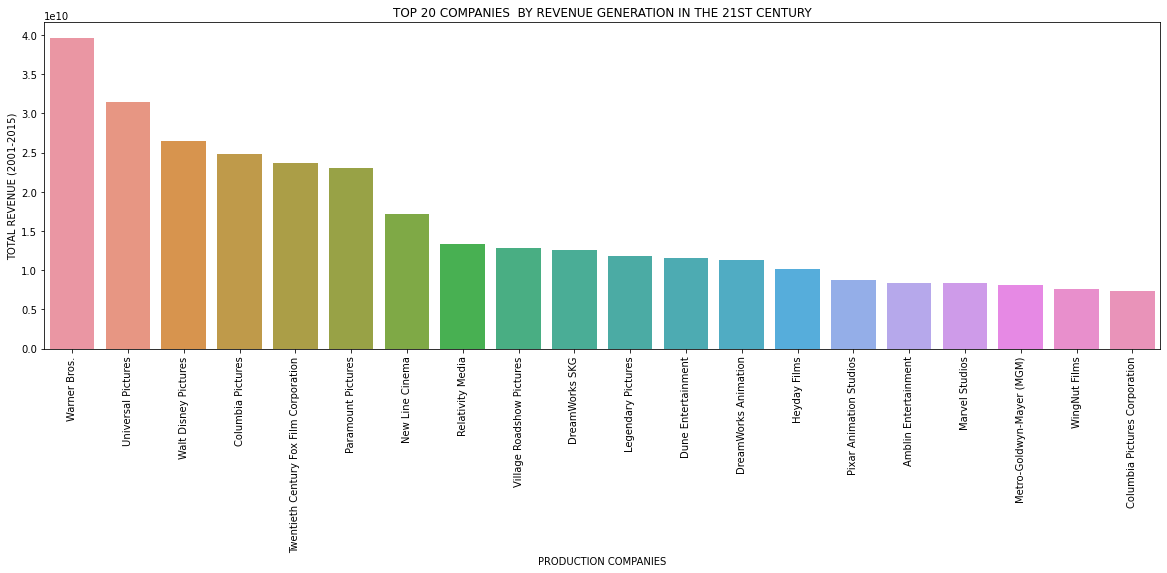

<Figure size 432x288 with 0 Axes>

In [66]:
Top_20 = Revenue_production_company_2001_2015.query("Total > 0").sort_values("Total", ascending = False).iloc[:20]
fig, ax = plt.subplots(figsize = (20,6))
g = sns.barplot(data=Top_20, x=Top_20.index, y="Total", ax= ax)
g.set_xticklabels(labels= list(Top_20.index),rotation = 90)
ax.set_title("TOP 20 COMPANIES  BY REVENUE GENERATION IN THE 21ST CENTURY")
ax.set_xlabel("PRODUCTION COMPANIES")
ax.set_ylabel("TOTAL REVENUE (2001-2015)")
plt.show()
plt.clf()

### HOW HAS REVENUE GENRETAED BY MOVIES CHANGED OVER THE YEARS
Revenue generated by movies have been **increasing** over years and **peaked in 2015**

In [67]:
Annual_Revenue = movies.groupby("release_year").agg({"revenue_adj":"sum"})

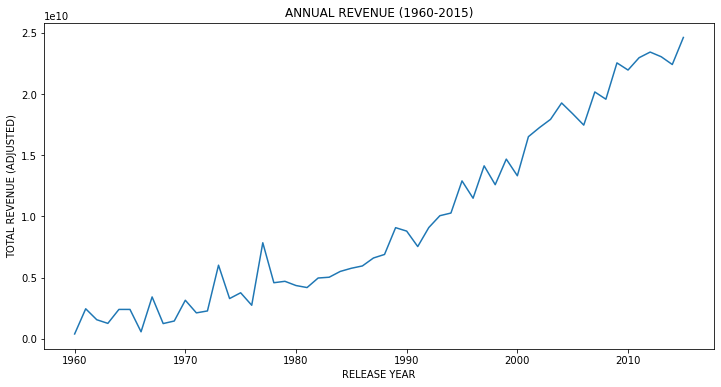

<Figure size 432x288 with 0 Axes>

In [68]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data=Annual_Revenue,x=Annual_Revenue.index, y="revenue_adj", ax= ax)
ax.set_title("ANNUAL REVENUE (1960-2015)")
ax.set_xlabel("RELEASE YEAR")
ax.set_ylabel("TOTAL REVENUE (ADJUSTED)")
plt.show()
plt.clf()